- https://docs.tavily.com/welcome

- https://platform.openai.com/api-keys



In [ ]:
import os
os.environ["TAVILY_API_KEY"] = "tvly-..."
os.environ["OPENAI_API_KEY"] = "sk-proj-..."

In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
%pip install langgraph-swarm langchain-openai tavily-python

  Using cached tavily_python-0.5.1-py3-none-any.whl.metadata (91 kB)
  Using cached langgraph-0.3.5-py3-none-any.whl.metadata (17 kB)
  Using cached langgraph_prebuilt-0.1.2-py3-none-any.whl.metadata (5.0 kB)
  Using cached msgpack-1.1.0-cp312-cp312-macosx_10_9_x86_64.whl.metadata (8.4 kB)
Using cached tavily_python-0.5.1-py3-none-any.whl (43 kB)
Using cached langgraph-0.3.5-py3-none-any.whl (131 kB)
Using cached langgraph_prebuilt-0.1.2-py3-none-any.whl (24 kB)
Using cached msgpack-1.1.0-cp312-cp312-macosx_10_9_x86_64.whl (85 kB)
Note: you may need to restart the kernel to use updated packages.


# **T or F ? Agent**

📖 [LangGraph Swarm](https://github.com/langchain-ai/langgraph-swarm-py)

- LangGraph기반 Swarm 스타일 Multi-Agent!
- Swarm은 Agent가 동적으로 서로에게 제어권을 넘겨주는(Hand-Off) Multi Agnet Architecture.




### **[T]** Web Search

In [3]:
from tavily import TavilyClient

tavily_client = TavilyClient()

In [4]:
tavily_client.search("What is Multi Agent?", max_results = 3)

{'query': 'What is Multi Agent?',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'title': 'What is a multi agent system in AI? - GeeksforGeeks',
   'url': 'https://www.geeksforgeeks.org/what-is-a-multi-agent-system-in-ai/',
   'content': 'Tutorials Python Tutorial System Design Tutorial Linux Tutorial Data Structures Tutorial Searching Algorithms Tutorial Sorting Algorithms Tutorial Algorithms Tutorial DSA Tutorial Python Tutorial Python Data Visualization Tutorial A Multi-Agent System (MAS) is a type of computer system where multiple independent entities, called agents, work together or compete in a shared environment to reach their goals. It can be used in trading where different algorithms (agents) interact with each other and market data to make trading decisions. Multi-Agent Reinforcement Learning in AI Reinforcement learning (RL) can solve complex problems through trial and error, learning from the environment to make optimal decisions. MAS (Multi-Age

### **[T]** Agent

- create_react_agent : 도구 호출(Tool-Calling)을 활용하는 Chat Model과 함께 작동하는 그래프 생성

In [5]:
from langchain_openai import ChatOpenAI

from langgraph.checkpoint.memory import InMemorySaver
from langgraph.prebuilt import create_react_agent
from langgraph_swarm import create_handoff_tool, create_swarm

##### LLM #####
model = ChatOpenAI(model="gpt-4o")


##### T #####
def search(query: str) -> dict:
    """Search the web for a query.

    Args:
        query: query string
    """
    return tavily_client.search(query)

t_agent = create_react_agent(
    model, # model
    [search, create_handoff_tool(agent_name="Fagent", description= "If the user makes emotional or self-deprecating statements, Transfer to Fagent")], # tools
    prompt="You are the Agent in charge of T in MBTI. You have to answer rationally and logically. (You can use search tool to search the web and find the basis.)", # prompt
    name="Tagent", # name for the CompiledStateGraph
)

### **[F]** Agent

In [6]:
##### F #####
def find_emotion(situation: str, emotion: str) -> dict:
    """If the user makes emotional, Separate the problem situation from the user’s emotions.
    Args:
        situation: problem situation string
        emotion: user's emotion string
    """
    return {"situation" : situation,
            "emotion" : emotion}

f_agent = create_react_agent(
    model,
    [find_emotion, create_handoff_tool(agent_name="Tagent", description= "If the user asks a question or seems to need a solution, Transfer to Tagent. It can answer rationally and logically.")],
    prompt="You are the Agent in charge of F in MBTI. You have to empathize with the question and answer it emotionally. (When user input is long, you can easily separate emotions and situations by using the find_emotion tool.)",
    name="Fagent",
)

### **[T + F]** Compile Swarm Agent

In [7]:
checkpointer = InMemorySaver()
workflow = create_swarm(
    [t_agent, f_agent],
    default_active_agent="Fagent"
)
app = workflow.compile(checkpointer=checkpointer)

config = {"configurable": {"thread_id": "1"}}

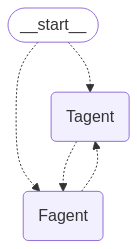

In [8]:
app

## DO IT !

In [9]:
while True:
    try:
        user_input = input("🧑‍💻 User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        turn = app.invoke(
            {"messages": [{"role": "user", "content": user_input}]},
            config,
        )
        messages = turn['messages']
        last_message = messages[-1]
        print(last_message.content)

    except:
        break

안녕하세요! 어떻게 지내세요? 오늘 하루가 어떠셨나요? 😊
우중충한 날씨는 정말이지 기분을 가라앉히게 만들죠. 이런 날씨에 특히 지치기 쉽기도 하고요. 혹시 오늘 특별히 힘드셨던 일은 없으셨나요? 그럴 때는 따뜻한 차 한 잔이나 마음에 드는 음악이 큰 위로가 될 수 있어요. 🍵🎶
내일의 날씨에 관한 정확한 정보를 위해서는 특정 지역을 지정해야 합니다. 일반적으로, 기상청이나 네이버 날씨와 같은 웹사이트를 방문하시면 지역별로 상세한 기상 정보를 확인하실 수 있습니다. [기상청 날씨누리](https://www.weather.go.kr/)가 좋은 참고 사이트입니다. 원하는 지역을 선택하시면 해당 지역의 예보를 확인할 수 있습니다.
서울의 날씨를 확인하려면 [기상청 날씨누리](https://www.weather.go.kr/w/weather/forecast/mid-term.do?stnId1=109) 웹사이트를 방문하시면 가장 정확한 정보를 얻으실 수 있습니다. 이 사이트에서는 서울 및 경기도의 중기 예보와 다양한 기상 정보를 제공합니다. 필요에 맞게 현재 기온, 강수 확률, 바람 등 세부 사항을 확인하시기 바랍니다.
서울의 오늘 날씨는 다음과 같습니다. [AccuWeather](https://www.accuweather.com/ko/kr/seoul/226081/hourly-weather-forecast/226081)와 [The Weather Channel](https://weather.com/ko-KR/weather/today/l/82e46175f97c224acf6b95afc4934fbae0e4ba123adcee8a52b7be97c303467b)를 참조하시면, 시간대별로 자세한 기온과 강수 확률 등을 확인할 수 있습니다. 

내일 서울의 날씨에 대해서는 [Free Meteo](https://freemeteo.kr/weather/seoul/hourly-forecast/tomorrow/?gid=1835848&language=korean&country=south-korea)

In [10]:
turn['messages']

[HumanMessage(content='안녕', additional_kwargs={}, response_metadata={}, id='cf1884a8-5ee2-4831-a957-8b8e5de726b2'),
 AIMessage(content='안녕하세요! 어떻게 지내세요? 오늘 하루가 어떠셨나요? 😊', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 158, 'total_tokens': 177, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_f9f4fb6dbf', 'finish_reason': 'stop', 'logprobs': None}, name='Fagent', id='run-d3c4a51b-526a-4621-9d17-2f42325387a9-0', usage_metadata={'input_tokens': 158, 'output_tokens': 19, 'total_tokens': 177, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
 HumanMessage(content='우중충한 날씨였어', additional_kwargs={}, response_metadata={}, id='0b7bc577-c730-4f11-99d2-5a00f